In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support,make_scorer
from sklearn.metrics import confusion_matrix

from splitTrainTest import splitTrainTest

In [2]:
binTest,binTrain = splitTrainTest('binary')

/home/mauro/Documents/work/BCV/astro/CRTS-transient-recognition-revised/notebooks/splitTrainTest.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTest['set'] = 'test'
/home/mauro/Documents/work/BCV/astro/CRTS-transient-recognition-revised/notebooks/splitTrainTest.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTrain['set'] = 'train'
/home/mauro/Documents/work/BCV/astro/CRTS-transient-recognition-revised/notebooks/splitTrainTest.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [7]:
allFeatures = [ 'skew',
                'std',
                'kurtosis',
                'beyond1st',
                'stetson_j',
                'stetson_k',
                'max_slope',
                'amplitude',
                'median_absolute_deviation',
                'median_buffer_range_percentage',
                'pair_slope_trend',
                'percent_amplitude',
                'percent_difference_flux_percentile',
                'flux_percentile_ratio_mid20',
                'flux_percentile_ratio_mid35',
                'flux_percentile_ratio_mid50',
                'flux_percentile_ratio_mid65',
                'flux_percentile_ratio_mid80',
                'small_kurtosis',
                'pair_slope_trend_last_30',
                'poly1_t1',
                'poly2_t2',
                'poly2_t1',
                'poly3_t3',
                'poly3_t2',
                'poly3_t1',
                'poly4_t4',
                'poly4_t3',
                'poly4_t2',
                'poly4_t1',
                'magnitudeRatio',
                'lombScargle',
                'rcb']

disantoFeatures = ['amplitude','beyond1st','flux_percentile_ratio_mid20','flux_percentile_ratio_mid35','flux_percentile_ratio_mid50',
                   'flux_percentile_ratio_mid65','flux_percentile_ratio_mid80','poly1_t1','median_absolute_deviation',
                   'median_buffer_range_percentage','max_slope','percent_amplitude',
                   'percent_difference_flux_percentile','pair_slope_trend_last_30','small_kurtosis','skew','std','magnitudeRatio','lombScargle','rcb']

ourFeatures = [ 'beyond1st',
                'kurtosis',
                'skew',
                'small_kurtosis',
                'std',
                'stetson_j',
                'stetson_k',
                'amplitude',
                'max_slope',
                'median_absolute_deviation',
                'median_buffer_range_percentage',
                'pair_slope_trend',
                'pair_slope_trend_last_30',
                'percent_amplitude',
                'percent_difference_flux_percentile',
                'flux_percentile_ratio_mid20',
                'flux_percentile_ratio_mid35',
                'flux_percentile_ratio_mid50',
                'flux_percentile_ratio_mid65',
                'flux_percentile_ratio_mid80',
                'poly1_t1',
                'poly2_t2',
                'poly2_t1',
                'poly3_t3',
                'poly3_t2',
                'poly3_t1',
                'poly4_t4',
                'poly4_t3',
                'poly4_t2',
                'poly4_t1']

In [15]:
assert(train.shape[0] == origtrain.shape[0])
assert(test.shape[0] == origtest.shape[0])

# Binary Classification 
Transients and non-transients 

In [ ]:
dataset, model, hyperparameters,features

In [16]:
#hypermarameters that gridsearch will optimize
def rf():
    params = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    return RandomForestClassifier(random_state=0, class_weight='balanced'), params

#metrics to be analized
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring

In [18]:
#learning 
model,params = rf()
grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                           refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(train[disantoFeatures], train.binaryClass)

# Copy classifier 
clf = grid_search

#see performance on test set
# scores = precision_recall_fscore_support(
#         test.binaryClass, clf.predict(test[disantoFeatures]), average='weighted')
# recall_scores.append(scores)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.908), f1_score=(train=1.000, test=0.908), precision=(train=1.000, test=0.910), recall=(train=1.000, test=0.908), total=   9.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.913), f1_score=(train=1.000, test=0.913), precision=(train=1.000, test=0.914), recall=(train=1.000, test=0.913), total=   8.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s
[CV] max_features=auto, n_estimators=700 .............................
[CV]  max_features=auto, n_estimators=700, accuracy=(train=1.000, test=0.909), f1_scor

NameError: name 'recall_scores' is not defined

In [20]:
recall_scoresnp = np.array(recall_scores)

print("Precision: {:.4f}".format(np.mean(recall_scoresnp[:,0])))
print("Recall:    {:.4f}".format(np.mean(recall_scoresnp[:,1])))
print("F-score:   {:.4f}".format(np.mean(recall_scoresnp[:,2])))

NameError: name 'recall_scores' is not defined

In [19]:
#calculate feature importance in descending order
importances = clf.best_estimator_.feature_importances_*100
featsCopy = disantoFeatures.copy()

Y = list(importances)
X = list(featsCopy)

yx = list(zip(Y, X))
yx.sort()

yx = yx[::-1]

x_sorted = [x for y, x in yx]
y_sorted = [y for y, x in yx]


In [20]:
importances

array([ 3.77695523, 10.15466271,  1.87133237,  1.78947017, 17.7475416 ,
        2.86704171,  2.15657817,  7.71815359,  7.95022542,  3.32280786,
        1.90882014,  2.65303758,  2.83756723,  1.13771833,  1.20562599,
        1.28921905,  1.27361483,  1.25843744,  2.94662901,  1.17255984,
        4.15086343,  1.89562768,  4.46233646,  0.60082469,  2.59925951,
        3.07258058,  0.42797824,  0.74311978,  2.16568845,  2.84372292])

In [21]:
print(len(disantoFeatures))
print(len(x_sorted))
print(disantoFeatures)

30
30
['skew' 'std' 'kurtosis' 'beyond1st' 'stetson_j' 'stetson_k' 'max_slope'
 'amplitude' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'percent_amplitude'
 'percent_difference_flux_percentile' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80'
 'small_kurtosis' 'pair_slope_trend_last_30' 'poly1_t1' 'poly2_t2'
 'poly2_t1' 'poly3_t3' 'poly3_t2' 'poly3_t1' 'poly4_t4' 'poly4_t3'
 'poly4_t2' 'poly4_t1']


In [22]:
 def shorten(x):
    return {
      'stetson_j':'stetson_j',
      'std':'std',
      'median_absolute_deviation':'mad',
      'amplitude':'amp',
      'poly1_t1':'poly1_t1',
      'poly2_t1':'poly2_t1',
      'skew':'skew',
      'poly3_t1':'poly3_t1',
      'small_kurtosis':'sk',
      'stetson_k':'stetson_k',
      'median_buffer_range_percentage':'mbrp',
      'percent_amplitude': 'p_amp',
      'percent_difference_flux_percentile':'pdfp',
      'poly4_t1':'poly4_t1',
      'poly3_t2':'poly3_t2',
      'poly4_t2':'poly4_t2',
      'max_slope':'max_slope',
      'kurtosis':'kurtosis',
      'pair_slope_trend':'pst',
      'poly2_t2':'poly2_t2',
      'beyond1st':'beyond1st',
      'flux_percentile_ratio_mid35':'fpr35',
      'flux_percentile_ratio_mid50':'fpr50',
      'flux_percentile_ratio_mid65':'fpr65',
      'flux_percentile_ratio_mid20':'fpr20',
      'flux_percentile_ratio_mid80':'fpr80',
      'pair_slope_trend_last_30':'pst_last30',
      'poly3_t3':'poly3_t3',
      'poly4_t3':'poly4_t3',
      'poly4_t4':'poly4_t4',
      'magnitudeRatio':'mr',
      'lombScargle':'ls',
      'rcb':'rcb'
      }[x]

In [23]:
#shorten name length
for i,x in enumerate(x_sorted):
    x_sorted[i]=shorten(x)

In [24]:
print(len(x_sorted))

30


In [25]:
x_sorted

['stetson_j',
 'std',
 'mad',
 'amp',
 'poly2_t1',
 'poly1_t1',
 'skew',
 'mbrp',
 'poly3_t1',
 'sk',
 'stetson_k',
 'poly4_t1',
 'pdfp',
 'p_amp',
 'poly3_t2',
 'poly4_t2',
 'max_slope',
 'pst',
 'poly2_t2',
 'kurtosis',
 'beyond1st',
 'fpr50',
 'fpr65',
 'fpr80',
 'fpr35',
 'pst_last30',
 'fpr20',
 'poly4_t3',
 'poly3_t3',
 'poly4_t4']

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


30
30


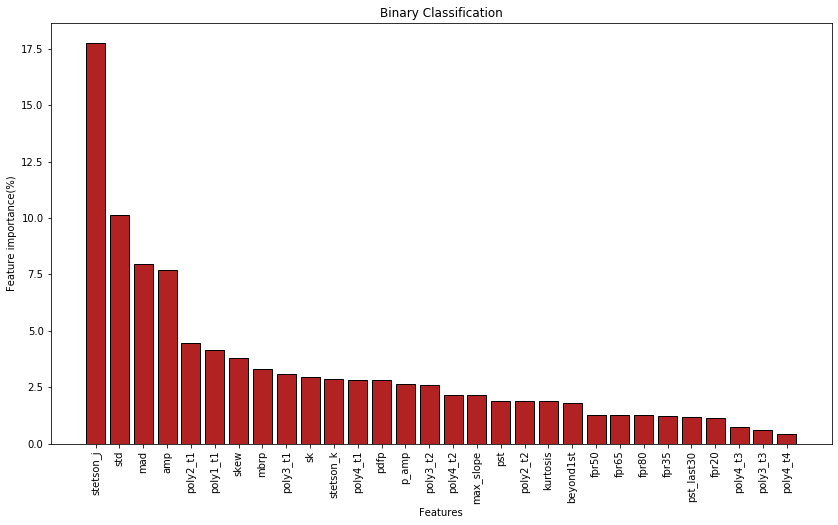

In [26]:

print(len(x_sorted))
print(len(y_sorted))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(14,8))
plt.gcf().subplots_adjust(bottom=0.15)
plt.bar(np.arange(len(y_sorted)), y_sorted,edgecolor='black',color='firebrick')
plt.xticks(np.arange(len(y_sorted)), x_sorted,rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Feature importance(%)')
plt.title("Binary Classification")
plt.savefig("../results/binFeatImportanceDisanto.pdf")

In [27]:
cm = confusion_matrix(test.binaryClass, clf.predict(test[disantoFeatures])).transpose()
cm

array([[3568,  216],
       [ 230,  851]])

In [28]:
def fMeasure(precision,recall):
    return 2*precision*recall/(precision+recall)

In [29]:
precisionNon = cm[0][0]/(cm[0][0]+cm[0][1])
recallNon = cm[0][0]/(cm[0][0]+cm[1][0])
precisionT = cm[1][1]/(cm[1][1]+cm[1][0])
recallT = cm[1][1]/(cm[1][1]+cm[0][1])

In [30]:
print("Precision of transients:     {:.4f}".format(precisionT))
print("Recall of transients:        {:.4f}".format(recallT))
print("F-measure of transients:     {:.4f}".format(fMeasure(precisionT,recallT)))
print("Precision of non-transients: {:.4f}".format(precisionNon))
print("Recall of non-transients:    {:.4f}".format(recallNon))
print("F-measure of non-transients: {:.4f}".format(fMeasure(precisionNon,recallNon)))


Precision of transients:     0.7872
Recall of transients:        0.7976
F-measure of transients:     0.7924
Precision of non-transients: 0.9429
Recall of non-transients:    0.9394
F-measure of non-transients: 0.9412


# 8-Class clasification

In [31]:
# main 6 transient classes
labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare']


In [32]:
# func to map labels to integer values
def manualFact(lab):
    labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare','Other','non-transient']
    return labels.index(lab)

In [33]:
origTrain = pd.read_pickle('./FixedData/8Class/train.pkl')
origTest = pd.read_pickle('./FixedData/8Class/test.pkl')

In [34]:
train = origTrain[['target']].merge(allDisanto, left_index=True, right_index=True)
test = origTest[['target']].merge(allDisanto, left_index=True, right_index=True)


In [35]:
assert(train.shape[0] == origTrain.shape[0])
assert(test.shape[0] == origTest.shape[0])

In [36]:
recall_scores = []
model,params = rf()
grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                           refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(train[disantoFeatures], train.target)
# Copy classifier
clf = grid_search

scores = precision_recall_fscore_support(
        test.target, clf.predict(test[disantoFeatures]), average='weighted')


recall_scores.append(scores)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.750), f1_score=(train=1.000, test=0.747), precision=(train=1.000, test=0.747), recall=(train=1.000, test=0.750), total=   6.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.752), f1_score=(train=1.000, test=0.752), precision=(train=1.000, test=0.755), recall=(train=1.000, test=0.752), total=   5.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s
[CV] max_features=auto, n_estimators=700 .............................
[CV]  max_features=auto, n_estimators=700, accuracy=(train=1.000, test=0.752), f1_scor

In [37]:
recall_scoresnp = np.array(recall_scores)

print("Precision: {:.4f}".format(np.mean(recall_scoresnp[:,0])))
print("Recall:    {:.4f}".format(np.mean(recall_scoresnp[:,1])))
print("F-score:   {:.4f}".format(np.mean(recall_scoresnp[:,2])))

Precision: 0.8503
Recall:    0.7555
F-score:   0.7915


In [38]:
confMatr = confusion_matrix(test.target, clf.predict(test[disantoFeatures])).transpose()
print(confMatr)
# 'SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare','Other','non-transient'

[[ 153   23    0    0    7    6   36   85]
 [  17  156    0    1    4    3   14   32]
 [   1    3   93    0   12    1   29   43]
 [   4    0    0   67    0    1    4  183]
 [  10    8    2    0   28    0    9    4]
 [  16    5    0    0    3   20    5  247]
 [  60   14    7    1    3    5  110  158]
 [  62    6    4    7    2   15   27 3046]]


In [39]:
normedMatrix = confMatr.copy()
# print(normedMatrix)
for i in range(len(normedMatrix)):
#     print(normedMatrix[:,i]/normedMatrix[:,i].sum())
    normedMatrix[:,i] = normedMatrix[:,i]/normedMatrix[:,i].sum()
#     print(normedMatrix[:,i])
# np.set_printoptions(suppress=True)
print(normedMatrix)
# np.set_printoptions(suppress=False)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [40]:
newMatr = []
for i in range(len(confMatr)):
    prec = confMatr[i][i]/(sum(confMatr[i,:]))
    rec = confMatr[i][i]/(sum(confMatr[:,i]))
    newMatr.append([prec,rec,fMeasure(prec,rec),sum(confMatr[:,i])])

In [41]:
np.set_printoptions(suppress=True)
print('    Precision        Recall         F-score      Cover')
print(np.array(newMatr))
np.set_printoptions(suppress=False)

    Precision        Recall         F-score      Cover
[[   0.49354839    0.47368421    0.48341232  323.        ]
 [   0.68722467    0.7255814     0.70588235  215.        ]
 [   0.51098901    0.87735849    0.64583333  106.        ]
 [   0.25868726    0.88157895    0.4          76.        ]
 [   0.45901639    0.47457627    0.46666667   59.        ]
 [   0.06756757    0.39215686    0.11527378   51.        ]
 [   0.30726257    0.47008547    0.37162162  234.        ]
 [   0.96118649    0.80200105    0.87440792 3798.        ]]


In [49]:
importances = clf.best_estimator_.feature_importances_*100
featsCopy = disantoFeatures.copy()

Y = list(importances)
X = list(featsCopy)

yx = list(zip(Y, X))

yx.sort()
# yx = yx[::-1]
yx = yx[::-1]



x_sorted = [x for y, x in yx]
y_sorted = [y for y, x in yx]


In [50]:
for i,x in enumerate(x_sorted):
    x_sorted[i]=shorten(x)

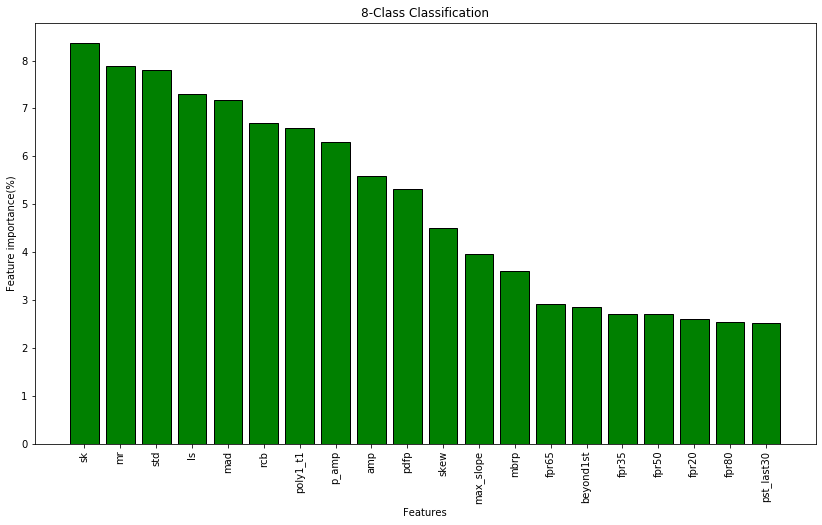

In [52]:
# from matplotlib.font_manager import FontProperties
# font = FontProperties()
# font.set_family('sans-serif')
# font.set_style('normal')

plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(14,8))
plt.gcf().subplots_adjust(bottom=0.15)
plt.bar(np.arange(len(y_sorted)), y_sorted,edgecolor='black',color='#008000')
plt.xticks(np.arange(len(y_sorted)), x_sorted,rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Feature importance(%)')
plt.title("8-Class Classification")
plt.savefig("../results/8clasFeatImportanceDisanto.pdf")